![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Computational Graphs: A Toy Example

## 1. A Very Simple Neural Network

Let us take a very simple neural network consisting of just 5 neurons. Our neural network looks like the following:

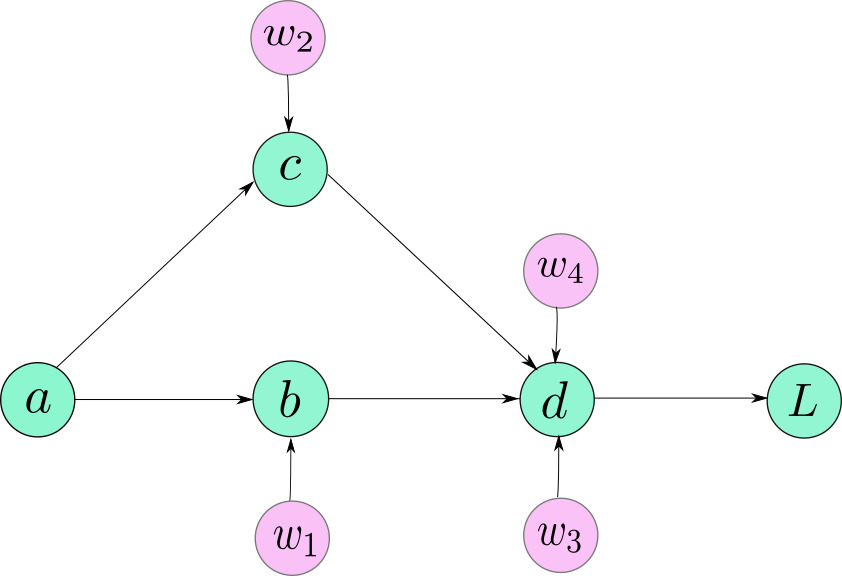

In [ ]:
# A Toy Neural Network

from IPython import display
display.Image("data/images/01-PyTorch-Foundations/PyTorch_02_Computational_Graphs-01-Toy-Example-01.jpg")

The following equations describe our neural network:

$b = w_1 * a$

$c = w_2 * a$

$d = w_3 * b + w_4 * c$

$L = 10 - d$

## 2. Computation of Gradients using Chain Rule

Let us compute the gradients for each of the learnable parameters $w$ as below:

$\frac {∂L} {∂w_4} = \frac {∂L} {∂d} * \frac {∂d} {∂w_4}$

$\frac {∂L} {∂w_3} = \frac {∂L} {∂d} * \frac {∂d} {∂w_3}$

$\frac {∂L} {∂w_2} = \frac {∂L} {∂d} * \frac {∂d} {∂c} * \frac {∂c} {∂w_2}$

$\frac {∂L} {∂w_1} = \frac {∂L} {∂d} * \frac {∂d} {∂c} * \frac {∂c} {∂w_1}$

## 3. Computation Graph of the simple neural network

All these gradients have been computed by applying the chain rule. We could manually compute the gradients of our network as it was very simple. Imagine, what if you had a network with 152 layers. Or, if the network had multiple branches.

When we design software to implement neural networks, we want to come up with a way that can allow us to seamlessly compute the gradients, regardless of the architecture type so that the programmer doesn't have to manually compute gradients when changes are made to the network. For this purpose, we use Computation Graphs along with  Automatic Differentiation using Autograd (`torch.autograd`).

Computation graphs provide a structured way to represent mathematical expression and operations in the form of a graph where
- nodes represent operations or variables
- edges represent dependencies between those operations

Computation graph for our simple neural network is given below:

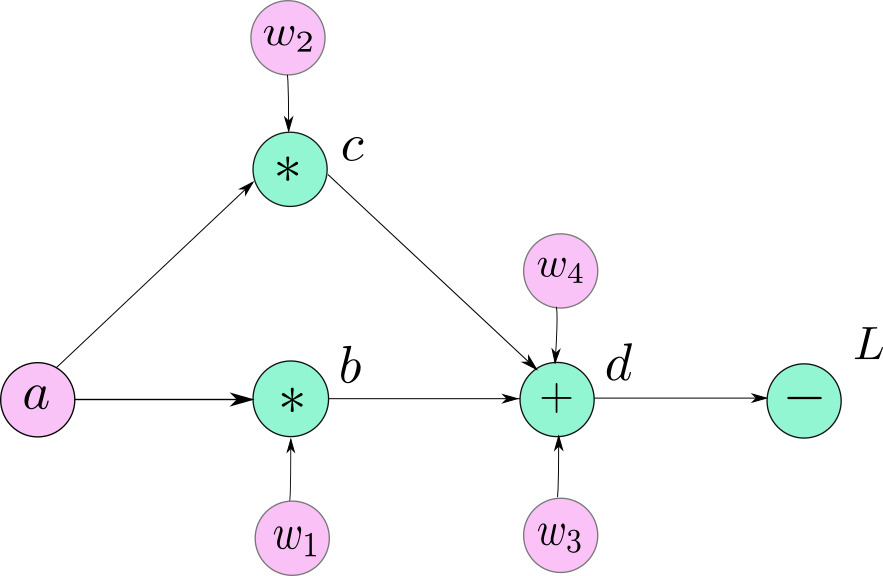

In [ ]:
# Computation Graph for our simple neural network

from IPython import display
display.Image("data/images/01-PyTorch-Foundations/PyTorch_02_Computational_Graphs-01-Toy-Example-02.jpg")

## 4. Computation of Gradients using Computation Graph

Now, we are ready to describe how we will compute gradients using a computation graph.

Each node of the computation graph, with the exception of leaf nodes, can be considered as a function which takes some inputs and produces an output. Consider the node of the graph which produces variable $d$ from $w_4c$ and $w_3b$. Therefore we can write

$d = f(w_4c, w_3b)$

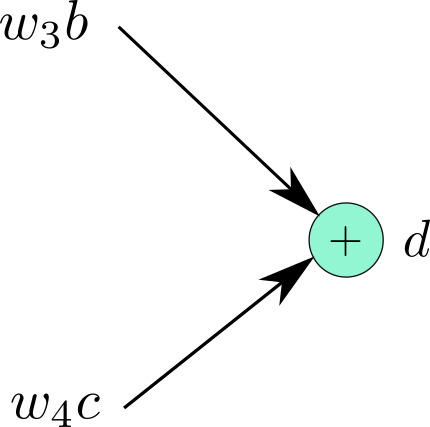

In [ ]:
# A single node of the computation graph for our simple neural network

from IPython import display
display.Image("data/images/01-PyTorch-Foundations/PyTorch_02_Computational_Graphs-01-Toy-Example-03.jpg")

Now, we can easily compute the gradient of $f$ with respect to it's inputs i.e. $\frac {∂f} {∂w_3b}$ and $\frac {∂f} {∂w_4c}$ which are both 1.

Now, label the edges coming into the nodes with their respective gradients like the following image:

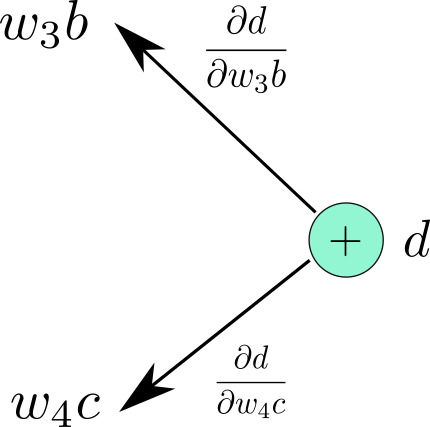

In [ ]:
# Local gradients for the single node

from IPython import display
display.Image("data/images/01-PyTorch-Foundations/PyTorch_02_Computational_Graphs-01-Toy-Example-04.jpg")

We do it for the entire graph. The graph looks like the following image:

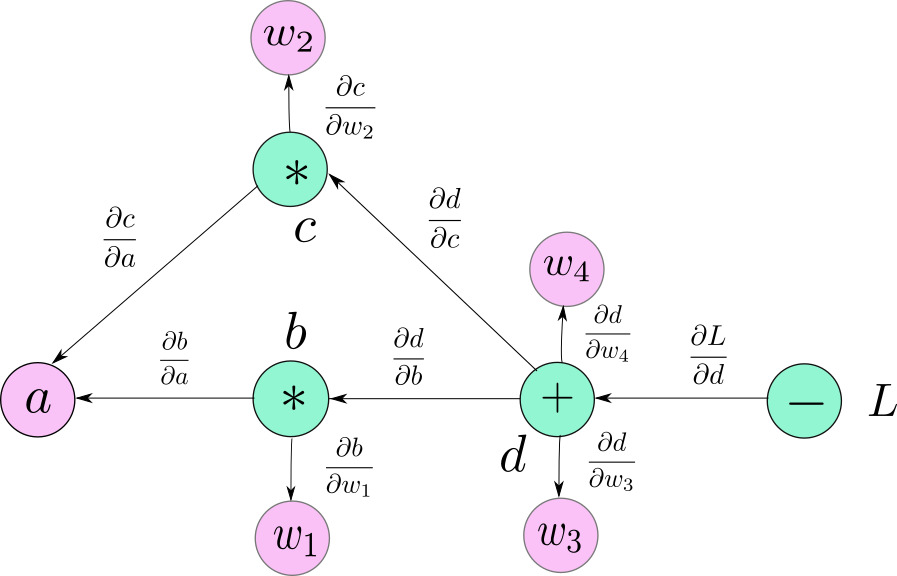

In [ ]:
# Backpropagation in the computation graph for our simple neural network

from IPython import display
display.Image("data/images/01-PyTorch-Foundations/PyTorch_02_Computational_Graphs-01-Toy-Example-05.jpg")

The algorithm for computing derivative of any node in this graph with respect to the loss $L$ is as below:

- Let's say we want to compute the derivative $\frac {∂f} {∂w_4}$.
    - We first trace down all possible paths from $d$ to $w_4$.
    - There is only one such path.
    - We multiply all the edges along this path.

If you see, the product is precisely the same expression we derived using chain rule. If there is more than one path to a variable from $L$, then we multiply the edges along each path and then add them together. For example, $\frac {∂L} {∂a}$ is computed as

$\frac {∂L} {∂a} = \frac {∂L} {∂d} * \frac {∂d} {∂b} * \frac {∂b} {∂a} + \frac {∂L} {∂d} * \frac {∂d} {∂c} * \frac {∂c} {∂a}$

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

In [ ]:
# Toy Neural Network => https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/


# Dynamic Comp Graph GIF => https://medium.com/intuitionmachine/pytorch-dynamic-computational-graphs-and-modular-deep-learning-7e7f89f18d1

# Comp Graph for MLP => https://www.codingame.com/playgrounds/9487/deep-learning-from-scratch---theory-and-implementation/multi-layer-perceptrons

# 2. Computational Graphs in PyTorch

In PyTorch, a computational graph is a directed acyclic graph (DAG) that represents the flow of operations and data within your deep learning model. It's like a roadmap that PyTorch uses to perform calculations and understand how each step affects the final output. Here's a breakdown of how computational graphs work in PyTorch:

**Components:**

- **Nodes:** These represent the mathematical operations performed on your data. In PyTorch, these nodes are typically created by functions or methods that perform operations on tensors.
- **Edges:** These connect the nodes and represent the flow of data between them. Edges point from the output of one operation (node) to the input of another.

**Construction:**

- PyTorch builds the computational graph dynamically as you define your model's forward pass. This means the graph isn't created all at once, but rather step-by-step as you write your code.
- Whenever you perform an operation on a tensor using a PyTorch function (like addition, multiplication, or activation functions), a new node is added to the graph, and edges are created to connect it to the previous nodes that generated the input data.

**Benefits:**

- **Simplified Representation:** Computational graphs provide a simplified representation of complex mathematical operations and the relationships between them.
- **Automatic Differentiation:** The computational graph is crucial for automatic differentiation, a core feature of PyTorch. By tracing the graph, PyTorch can efficiently calculate gradients (rates of change) for any output with respect to its inputs. This is essential for training neural networks using backpropagation.
- **Memory Optimization:** The computational graph allows PyTorch to optimize memory usage during calculations. By knowing the dependencies between operations, PyTorch can avoid storing unnecessary intermediate results.

**Execution:**

- PyTorch uses the computational graph for two main purposes:
    - **Forward Pass:** During the forward pass, PyTorch feeds the input data into the first node of the graph and then follows the edges, performing the operations at each node in the order defined by the graph. This ultimately computes the final output of your model.
    - **Backward Pass (Backpropagation):** When you train a neural network, you need to calculate the gradients to update the model's weights and biases. PyTorch utilizes the computational graph again, but traverses it backward. It starts with the error at the output, propagates it back through the graph using the gradients calculated for each node, and updates the weights accordingly.

**Key Points:**

- The computational graph is invisible to the user and managed by PyTorch internally. However, understanding its concept is essential for effectively using PyTorch and debugging your deep learning models.
- Since the graph is dynamic, the order you define your operations in your code matters. This is because it determines the order of the nodes and edges in the graph.

**In essence, the computational graph is the backbone of PyTorch's automatic differentiation and training process. It provides a structured way to represent your model's computations and enables efficient training by facilitating backpropagation.**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)